## multi class logistic regresyon



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
df["Species"].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

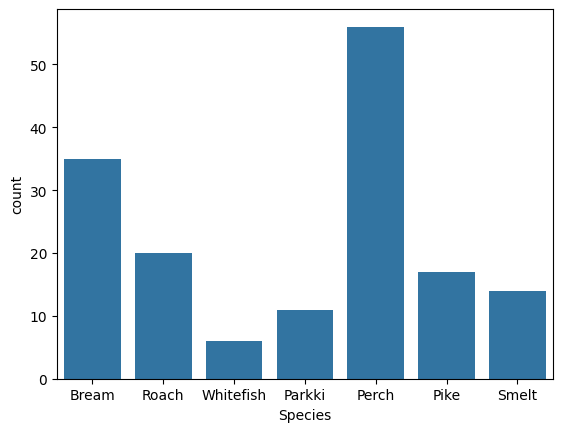

In [8]:
sns.countplot(x=df["Species"])

<Axes: xlabel='Weight', ylabel='Height'>

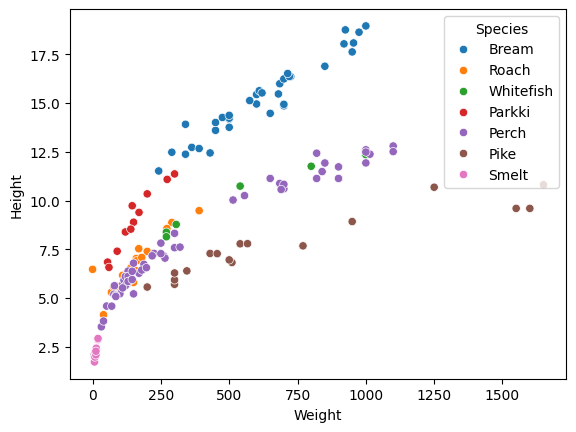

In [9]:
sns.scatterplot(x="Weight", y="Height", data=df, hue="Species")

In [10]:
X = df.drop("Species", axis=1)
y=df["Species"]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=9)

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [22]:
log_model = LogisticRegression(solver="saga", multi_class="ovr", max_iter=2000)


In [23]:
penalty = ["l1", "l2"]

C = np.logspace(0,5,16) #logaritmik olarak 0la 5 arasında sayı üretti. 1den büyükse penalty uygulamaya gerek kalmıyor

In [24]:
grid_model = GridSearchCV(
    log_model,
    param_grid={
        "C" : C,
        "penalty" : penalty
    }
     
)

In [25]:
grid_model.fit(X_train, y_train)

c:\Users\Betül\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Betül\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Betül\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Betül\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Betül\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which

GridSearchCV(estimator=LogisticRegression(max_iter=2000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [26]:
grid_model.best_params_ # l1 yani bazı coefler 0 olacak

{'C': 10.0, 'penalty': 'l1'}

In [27]:
grid_model.best_estimator_

LogisticRegression(C=10.0, max_iter=2000, multi_class='ovr', penalty='l1',
                   solver='saga')

In [28]:
grid_model.best_estimator_.coef_

array([[ -2.73154774,   0.        ,   0.        ,   0.        ,
         11.21924073,  -1.199789  ],
       [ -7.15114959,   0.        ,   0.        , -11.10581325,
         11.2649938 ,   0.        ],
       [ -1.36885208,   5.41918281,  17.95069583, -26.954797  ,
         -1.63730372,   5.92091683],
       [ -0.66797367,   2.51489482,   2.19123398,   3.91025186,
         -5.21240607,  -2.39916958],
       [-10.03062633,  -1.39628383, -13.14177521,  15.15255188,
         -1.00873799,   4.72616211],
       [  0.        ,   2.32154205,   0.        ,   0.88389102,
         -5.2348065 ,  -6.13282838],
       [ -2.42930832,  -0.7332273 ,   0.        ,   0.        ,
          0.        ,   3.43209505]])

In [30]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [33]:
fish_pred = grid_model.predict(X_test)

In [34]:
accuracy_score(y_test, fish_pred)

0.875

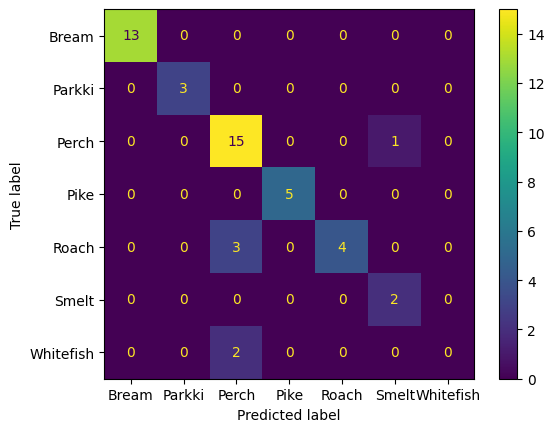

In [35]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [36]:
print(classification_report(y_test, fish_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        13
      Parkki       1.00      1.00      1.00         3
       Perch       0.75      0.94      0.83        16
        Pike       1.00      1.00      1.00         5
       Roach       1.00      0.57      0.73         7
       Smelt       0.67      1.00      0.80         2
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.88        48
   macro avg       0.77      0.79      0.77        48
weighted avg       0.86      0.88      0.85        48



c:\Users\Betül\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Betül\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Betül\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo